# Muhammad Khubaib - mk07218

In [2]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
#read csv file
df = pd.read_csv('EmployeeSalaryRegression.csv')
df["JobRole"].head()

0          Sales Executive
1       Research Scientist
2    Laboratory Technician
3       Research Scientist
4    Laboratory Technician
Name: JobRole, dtype: object

In [4]:
#Q1

model = ols('MonthlyIncome ~ TotalWorkingYears', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.73e-292
Time:                        18:31:09   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1227.9353    137.29

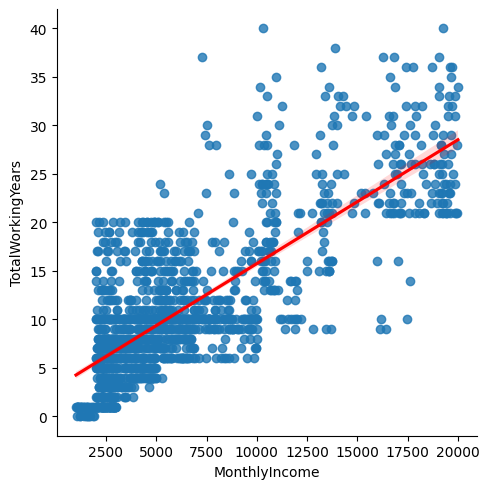

In [5]:
sns.lmplot(x='MonthlyIncome', y='TotalWorkingYears', data=df, line_kws={'color': 'red'})
plt.show()

####In this case, the p-value for Age is 0.000, which is much less than 0.05. This means that the relationship between Age and DistanceFromHome is statistically significant, indicating a positive linear connection between TotalWorkingYears and MonthlyIncome. As Total Working Years increases, Monthly Income also goes up. This is also evident from the graph where data points closely align with the regression line. The linear equation can be expressed as follows: y = 1228 + 468x

#### For every year that the employee works, their monthly income increases by 468 dollars. Additionally, since the R-squared value is 0.597, it can be said that the model is a good fit for the data. The greater the number of years you work, the more your salary increases as the experience you gain would be quite invaluable.

In [6]:
#Q2
model = ols('DistanceFromHome ~ Age', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004174
Date:                Tue, 31 Oct 2023   Prob (F-statistic):              0.948
Time:                        18:31:09   Log-Likelihood:                -5161.6
No. Observations:                1470   AIC:                         1.033e+04
Df Residuals:                    1468   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2478      0.881     10.497      0.0

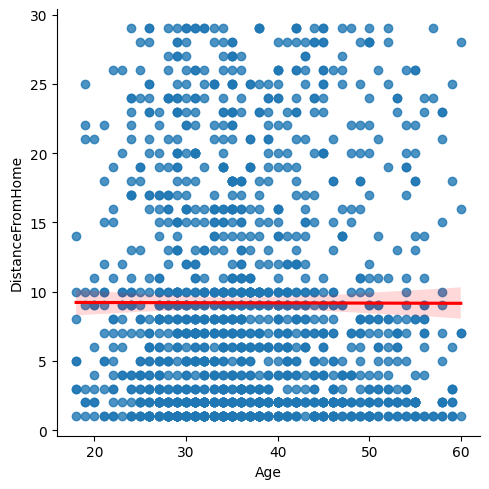

In [16]:
#Scatter plot with regression line
sns.lmplot(x='Age', y='DistanceFromHome', data=df, line_kws={'color': 'red'})
plt.show()

####As the p-value is greater than 0.05, it can be said that there is not a strong corelation between our two variables. From the table we can see that the r-squared value is 0.000, which means that the variation in Monthly Income cannot be explained by the variation in Years At Company indicating that it is not a good fit, something also evident from the graph as the data points do not align with the regression line. This means that there is no linear relationship between Years At Company and Monthly Income.

In [18]:
#Q3

#calculate the correlation between the two variables in each case.
x = (df['TotalWorkingYears'].corr(df['MonthlyIncome']))
print("Correlation between TotalWorkingYears and MonthlyIncome:",x)

y = (df['Age'].corr(df['DistanceFromHome']))
print("Correlation between Age and DistanceFromHome", y)

Correlation between TotalWorkingYears and MonthlyIncome: 0.7728932462543561
Correlation between Age and DistanceFromHome -0.0016861201480870068



####In the first scenario, the correlation coefficient stands at 0.77, signifying a strong positive correlation. This indicates that when TotalWorkingYears increases, MonthlyIncome tends to rise as well. This correlation is vividly reflected in our graph, where data points closely align the regression line. In essence, the more years an individual works, the more their monthly income grows.

####On the other hand, we observe a correlation of -0.0016 between Age and DistanceFromHome in the second scenario, which is an extremely weak negative correlation. The scatterplot reveals that data points are dispersed and do not align with the regression line. Consequently, there is no significant linear relationship between Age and Distance From Home.

####Both of these align with our earlier response in the second part of the question.






In [78]:
#Q4

categories = df.select_dtypes(exclude=['int','float']).columns.tolist()
df4 = pd.get_dummies(df, columns=[x for x in categories])
X = df4.drop(['MonthlyIncome'], axis=1)
Y = df4['MonthlyIncome']
modelQ4 = sm.OLS(Y,sm.add_constant(X)).fit()
print(modelQ4.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     715.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:35:15   Log-Likelihood:                -12394.
No. Observations:                1470   AIC:                         2.486e+04
Df Residuals:                    1435   BIC:                         2.504e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

#### We'll be using the p-value to determine the most and least influential factors in the MonthlyIncome regression model. A p-value below 0.05 signifies a strong relationship, and vice-versa.

#### Significant factors: Using the Monthly Income regression model, we found the three variables with the lowest p-values: Job Level, Total Working Years, and Job Role (we are including it's subfields in it too). These inputs exert the greatest influence on the of Monthly Income for employees.

#### Non-Significant factors: Using the Monthly Income regression model, we found the three variables with the highest p-values: Performance Rating, Years In CurrentRole, and Work Life Balance. Their high p-values indicate that they have very low impact on the calculation of MonthlyIncome for employees.

In [75]:

new_input = pd.DataFrame({
    'Age': [40], 'Department': ['Research & Development'], 'DistanceFromHome': [3], 'Education': [3], 'EducationField': ['Life Sciences'], 'Gender': ['Male'], 'HourlyRate': [40],
    'JobLevel': [3], 'JobRole': ['Laboratory Technician'], 'MaritalStatus': ['Single'], 'NumCompaniesWorked': [2], 'OverTime': ['No'], 'PerformanceRating': [3], 'StockOptionLevel': [1],
    'TotalWorkingYears': [11], 'TrainingTimesLastYear': [3], 'WorkLifeBalance': [2], 'YearsAtCompany': [2], 'YearsInCurrentRole': [2], 'YearsSinceLastPromotion': [1], 'YearsWithCurrManager': [2] })

new_input = pd.concat([df, new_input], ignore_index=True)
new_input = new_input.drop(['MonthlyIncome'], axis=1)
df4 = pd.get_dummies(new_input, columns=[x for x in categories])
df4 = sm.add_constant(df4)
print("The predicted MonthlyIncome is: ")
print(modelQ4.predict(df4.tail(1)))


The predicted MonthlyIncome is: 
1470    8215.870927
dtype: float64


#### The predicted monthly income for an employee having the attributes shown in the new input variable above would be around 8215.87 dollars.

In [53]:
#Q5

df5 = pd.get_dummies(df, columns=[x for x in categories])
X = df5.drop(['HourlyRate'], axis=1)
Y = df5['HourlyRate']
modelQ5 = sm.OLS(Y,sm.add_constant(X)).fit()
print(modelQ5.summary())

                            OLS Regression Results                            
Dep. Variable:             HourlyRate   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6846
Date:                Tue, 31 Oct 2023   Prob (F-statistic):              0.916
Time:                        20:18:22   Log-Likelihood:                -6501.3
No. Observations:                1470   AIC:                         1.307e+04
Df Residuals:                    1435   BIC:                         1.326e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 


####We'll be using the p-value to determine the most and least influential factors in the Hourly Rate regression model. A p-value below 0.05 signifies a strong relationship, and vice-versa.
####Significant factors: Using the Monthly Income regression model, we found the three variables with the lowest p-values: Gender, OverTime, and Marital Status. These inputs exert the greatest influence on the of Hourly Rate for employees.
####Non-Significant factors: Using the same regression model, we found the three variables with the highest p-values: Years With Curr Manager, Work Life Balance, and Years At Company. Their high p-values indicate that they have very low impact on the calculation of Hourly Rate for employees. Bit surprising for me as I would have thought that if an individual was working under the same the same manager, they would've a greater hourly rate but not the case it seems.

In [97]:

new_inputs = pd.DataFrame({
    'Age': [40], 'Department': ['Research & Development'], 'DistanceFromHome': [6], 'Education': [3], 'EducationField': ['Life Sciences'], 'Gender': ['Male'], 'JobLevel': [2], 'JobRole': ['Laboratory Technician'],
    'MaritalStatus': ['Single'], 'NumCompaniesWorked': [2], 'OverTime': ['No'],'PerformanceRating': [3], 'StockOptionLevel': [1], 'TotalWorkingYears': [11], 'TrainingTimesLastYear': [4],
    'WorkLifeBalance': [3], 'YearsAtCompany': [2], 'YearsInCurrentRole': [2], 'YearsSinceLastPromotion': [1], 'YearsWithCurrManager': [2], 'MonthlyIncome': [5500] })


new_inputs = pd.concat([df, new_inputs], ignore_index=True)
new_inputs = new_inputs.drop(['HourlyRate'], axis=1)
df5 = pd.get_dummies(new_inputs, columns=[x for x in categories])
df5 = sm.add_constant(df5)
print("The predicted HourlyRate is: ")
print(modelQ5.predict(df5.tail(1)))


The predicted HourlyRate is: 
1470    67.016132
dtype: float64


#### The predicted hourly rate for an employee having the attributes present in new_inputs variable above would be around 67 dollars.

In [96]:
#Q6
df6 = df4[["JobLevel", "TotalWorkingYears", "JobRole_Sales Executive", "JobRole_Healthcare Representative", "JobRole_Research Director", "JobRole_Research Scientist", "JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Sales Representative"]]
X = df6
Y = df4['MonthlyIncome']
modelQ6 = sm.OLS(Y, sm.add_constant(X)).fit()
print(modelQ6.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2434.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:48:20   Log-Likelihood:                -12406.
No. Observations:                1470   AIC:                         2.483e+04
Df Residuals:                    1459   BIC:                         2.489e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [117]:
df


,Age,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Sales,1,2,Life Sciences,Female,94,2,Sales Executive,Single,...,3,0,8,0,1,6,4,0,5,5993
1,49,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,...,4,1,10,3,3,10,7,1,7,5130
2,37,Research & Development,2,2,Other,Male,92,1,Laboratory Technician,Single,...,3,0,7,3,3,0,0,0,0,2090
3,33,Research & Development,3,4,Life Sciences,Female,56,1,Research Scientist,Married,...,3,0,8,3,3,8,7,3,0,2909
4,27,Research & Development,2,1,Medical,Male,40,1,Laboratory Technician,Married,...,3,1,6,3,3,2,2,2,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,Male,41,2,Laboratory Technician,Married,...,3,1,17,3,3,5,2,0,3,2571
1466,39,Research & Development,6,1,Medical,Male,42,3,Healthcare Representative,Married,...,3,1,9,5,3,7,7,1,7,9991
1467,27,Research & Development,4,3,Life Sciences,Male,87,2,Manufacturing Director,Married,...,4,1,6,0,3,6,2,0,3,6142
1468,49,Sales,2,3,Medical,Male,63,2,Sales Executive,Married,...,3,0,17,3,2,9,6,0,8,5390


#### As the r-squared value is 0.943 which is very close to 1, we can say that this model is a better fit. The 94.3% of the variation in MonthlyIncome can be easily explained using TotalWorkingYears and JobRole as well. As the pi-value is 0.000, we can say that we have a strong relationship. Overall, it can be said that this model is way better than the question 4 model.

In [129]:
#Q7
recorda = pd.DataFrame({
    'Age': [55], 'Department': ['Sales'], 'DistanceFromHome': [8], 'Education': [3], 'EducationField': ['Life Sciences'], 'Gender': ['Male'], 'HourlyRate': [64],
    'JobLevel': [3], "JobRole_Healthcare Representative": [0], "JobRole_Human Resources" : [0], "JobRole_Laboratory Technician" : [0], 'JobRole_Manager' : [0], 'JobRole_Manufacturing Director' : [0],
    'JobRole_Research Director' : [0], 'JobRole_Research Scientist' : [0], 'JobRole_Sales Executive' : [1], 'JobRole_Sales Representative' : [0],
    'MaritalStatus': ['Married'], 'NumCompaniesWorked': [5], 'OverTime': ['Yes'], 'PerformanceRating': [2], 'StockOptionLevel': [2], 'TotalWorkingYears': [23], 'TrainingTimesLastYear': [5],
    'WorkLifeBalance': [2], 'YearsAtCompany': [19], 'YearsInCurrentRole': [3], 'YearsSinceLastPromotion': [3], 'YearsWithCurrManager': [7]
})

recordb = pd.DataFrame({
    'Age' : [40], 'Department' : ['Research & Development'], 'DistanceFromHome' : [10], 'Education' : [3], 'EducationField' : ['Marketing'], 'Gender': ['Female'], 'HourlyRate': [62], 'JobLevel': [2],
    "JobRole_Healthcare Representative": [0], "JobRole_Human Resources" : [1], "JobRole_Laboratory Technician" : [0], "JobRole_Manager" : [0], "JobRole_Manufacturing Director" : [0],
    "JobRole_Research Director" : [0], "JobRole_Research Scientist" : [0], "JobRole_Sales Executive" : [0], "JobRole_Sales Representative" : [0], 'MaritalStatus': ['Married'],
    'NumCompaniesWorked': [1], 'OverTime': ['No'], 'PerformanceRating': [1], 'StockOptionLevel': [0], 'TotalWorkingYears': [11], 'TrainingTimesLastYear': [1],
    'WorkLifeBalance': [3], 'YearsAtCompany': [6], 'YearsInCurrentRole': [1], 'YearsSinceLastPromotion': [1],'YearsWithCurrManager': [3],
})

X = pd.concat([df, recorda, recordb], ignore_index=True)
X = X.drop(['MonthlyIncome'], axis=1)

X = X[["JobLevel", "TotalWorkingYears", "JobRole_Healthcare Representative", "JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director",
       "JobRole_Research Director", "JobRole_Research Scientist", "JobRole_Sales Executive", "JobRole_Sales Representative"]]

X = sm.add_constant(X, has_constant='add')

print("The predicted MonthlyIncome for record1 is: ")
print(modelQ6.predict(X.tail(2)))


The predicted MonthlyIncome for record1 is: 
1470    9270.383096
1471    6083.374737
dtype: float64


####The predicted MonthlyIncome for 'recorda' is around $9270, which is relatively higher than the other. This prediction could be attributed to factors such as a high TotalWorkingYears, high JobLevel, presence of'Sales Executive' job role, and the fact that the individual works overtime.

####The predicted MonthlyIncome for 'recordb' is around $6,083, which is moderate. This prediction could be influenced by factors such as a lower TotalWorkingYears, lower JobLevel, 'Human Resources' job role, and not working overtime.

#### The predicted values for Monthly Income given makes sense. In the real life, job levels and total working years are closely related to real life monthly incomes.